# Classification

In this example we'll use the [**Iris dataset**](https://en.wikipedia.org/wiki/Iris_flower_data_set), a really common and publicly available dataset for classification.

![Iris](http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png)

It's already built into the scikit learn package, we can just do `load_iris()`. (Read more [in scikit-learn docs](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)).

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

%matplotlib inline

In [73]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [21]:
print(iris.DESCR[:471])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica


In [52]:
df = pd.DataFrame(
    data=np.c_[iris.data, iris.target],
    columns=iris.feature_names + ['target'])

In [46]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [56]:
df['Species'] = pd.Series(iris.target_names).take(iris.target).values

## Splitting the Data

We can't test or validate our model with the same data we're using to train it. But these 150 observations are the only ones we have, so we'll need to split them into "training" and "testing" sets.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.4, random_state=10)

Now that we've split the data, we can start "classifying" it.

# Classification Algorithms

## K Nearest Neighbors

The [K Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is probably the simplest classification algorithm. It's highly intuitive.

In [32]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5,3.6,1.4,0.2,0,setosa


Using only two variables ("Sepal length" and "Sepal width"), we can now visualize a little bit how the species are distributed:

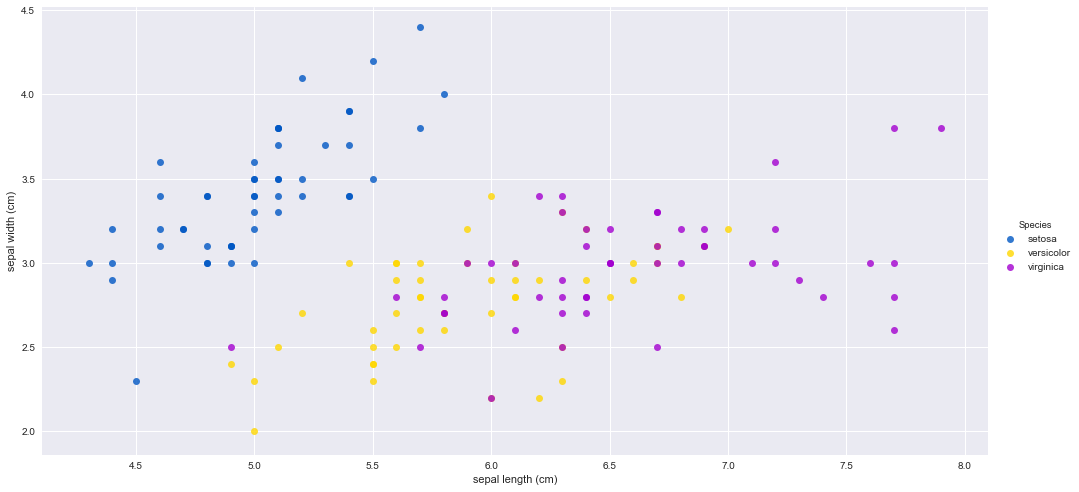

In [112]:
sns.lmplot(
    x="sepal length (cm)", y="sepal width (cm)", data=df,
    size=7, aspect=2,
    fit_reg=False, hue='Species', legend=True, palette='prism')

Using only the sepal, we can see that there's a clear boundary between "Setosas" and the rest ("Versicolor" and "Virginica").

How would we respond to a new, unknown observation? Let's visualize it first:

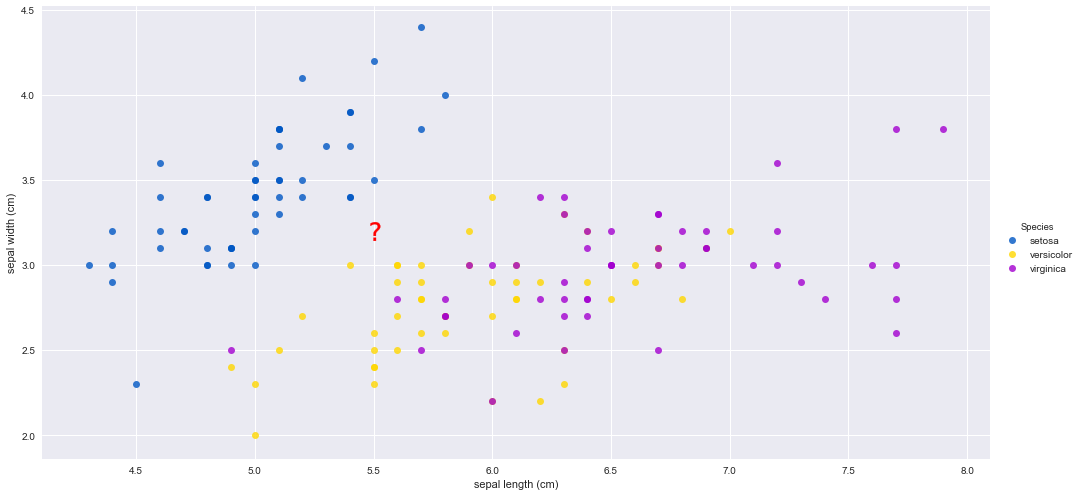

In [116]:
grid = sns.lmplot(
    x="sepal length (cm)", y="sepal width (cm)", data=df,
    size=7, aspect=2,
    fit_reg=False, hue='Species', legend=True, palette='prism')
plt.scatter([5.5], [3.2], marker='$?$', color='red', s=[350])

The K-nearest neighbors will try to decide the "species" of the new observation based on the, wait for it, K nearest neighbors!

In [117]:
from matplotlib.patches import Ellipse

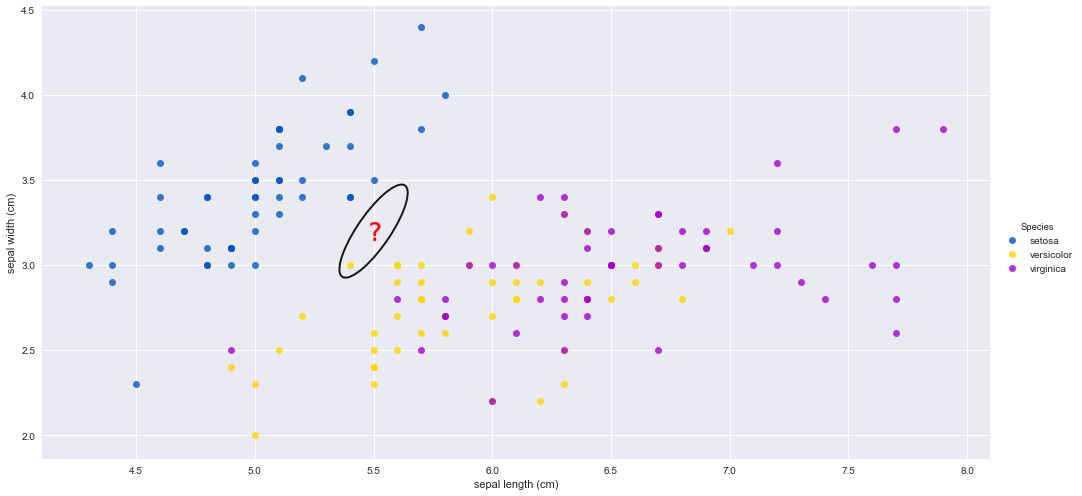

In [143]:
region = Ellipse(xy=(5.5, 3.2), width=.6, height=.15, angle=245, fill=False, lw=2)

grid = sns.lmplot(
    x="sepal length (cm)", y="sepal width (cm)", data=df,
    size=7, aspect=2,
    fit_reg=False, hue='Species', legend=True, palette='prism')
plt.scatter([5.5], [3.2], marker='$?$', color='red', s=[350])

grid.ax.add_artist(region)

The "Hyperparam" passed to the algorithm is used to decide "how many" **K** neighbors to use to classify the new observation.

![](https://docs.google.com/drawings/d/e/2PACX-1vQKmHrenJp508HB-6d0oN0V3RMDqpVCHt2V3E1T8RCRnYdyv50sSIQNli2leRUP7LpT6lmbEViUNRqY/pub?w=1202&h=810)

The scikit learn code is simple, as usual:

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [146]:
knn.score(X_test, y_test)

0.95

In [158]:
results = pd.DataFrame({
    'Sepal Length': X_test[:,0],
    'Sepal Width': X_test[:,1],
    'Petal Length': X_test[:,2],
    'Petal Width': X_test[:,3],
    'True Values': y_test,
    'Predicted': knn.predict(X_test)
}, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'True Values', 'Predicted'])
results.head()

,Sepal Length,Sepal Width,Petal Length,True Values,Predicted
0,6.3,2.3,4.4,1,1
1,6.4,2.7,5.3,2,2
2,5.4,3.7,1.5,0,0
3,6.1,3.0,4.6,1,1
4,5.0,3.3,1.4,0,0


In [163]:
misses = results[results['True Values'] != results['Predicted']]
misses

,Sepal Length,Sepal Width,Petal Length,True Values,Predicted
6,6.3,2.5,4.9,1,2
47,5.9,3.2,4.8,1,2
57,6.1,2.9,4.7,1,2


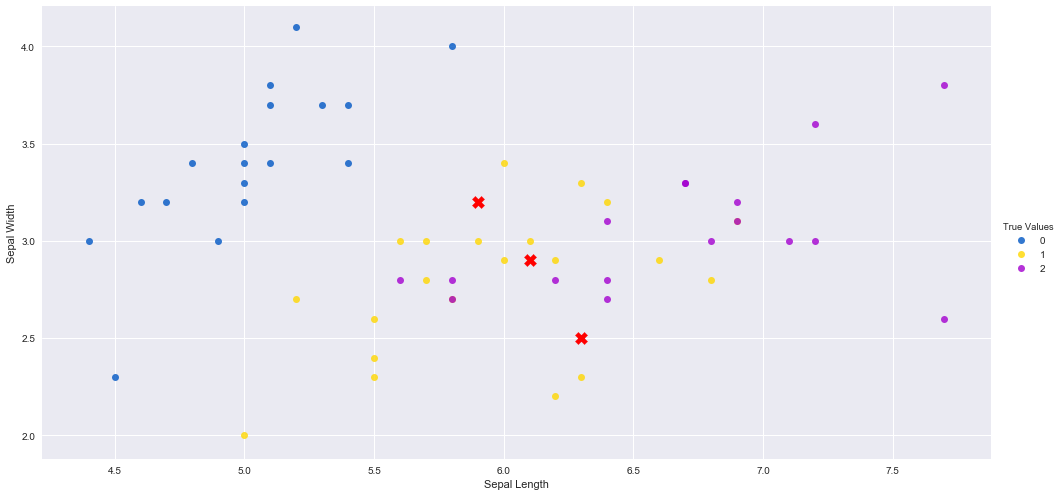

In [170]:
grid = sns.lmplot(
    x="Sepal Length", y="Sepal Width", data=results,
    size=7, aspect=2,
    fit_reg=False, hue='True Values', legend=True, palette='prism')
plt.scatter(misses['Sepal Length'].values, misses['Sepal Width'].values, marker='X', color='red', s=[150])